# Nairobi Ambulance Challenge - Data exploration and preprocessing

### Bill Ton Hoang Nguyen and Ignacio Roldan

1) Define Algorithm - Find a suitable algorithm for the task. Look into boosting techniques such as LightGBM or XGBoost. Since our data will be tabular (I think) neural nets will not behave too good.

2) Define input vector - It migth be a table where each position have some features associated such as weather or segment info


In [1]:
#Import libraries

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from lightgbm import LGBMClassifier

## Training data

In [2]:
# Load the training data about crashes
df = pd.read_csv('DataJupyter/Train.csv', parse_dates=['datetime'])
print(df.shape)
df.tail(10)

(6318, 4)


uid            datetime  latitude  longitude
6308  6309 2019-06-29 12:15:44 -1.325402  36.848130
6309  6310 2019-06-29 12:16:14 -1.325402  36.848130
6310  6311 2019-06-29 15:18:14 -1.475817  36.956980
6311  6312 2019-06-29 15:18:44 -1.475817  36.956980
6312  6313 2019-06-29 17:40:14 -1.248039  36.871635
6313  6314 2019-06-29 18:52:44 -1.262271  36.726540
6314  6315 2019-06-30 09:57:44 -1.279468  36.790449
6315  6316 2019-06-30 12:02:14 -1.322109  36.825248
6316  6317 2019-06-30 16:59:14 -1.278589  36.816518
6317  6318 2019-06-30 20:06:14 -1.211500  36.907635

In [11]:
#Plotting Training Data

#Plot
df['just_date'] = df['datetime'].dt.date
# df['just_date'].astype(str).str.replace("-","").astype(int)

df['just_date'].value_counts().head(50)
#df['just_date'].value_counts().sort_values().plot(kind = 'barh')

2018-05-09    75
2018-07-24    69
2018-03-05    66
2019-02-19    57
2018-01-03    43
2018-03-04    39
2018-08-10    38
2019-04-05    36
2018-05-02    35
2019-05-25    34
2018-03-02    33
2018-06-30    33
2018-01-25    32
2018-08-17    32
2018-05-17    32
2018-01-08    31
2019-02-12    30
2019-02-05    30
2019-02-23    29
2019-02-27    29
2019-04-16    28
2018-02-20    28
2018-12-12    28
2019-01-30    28
2018-01-07    28
2019-05-08    27
2018-06-10    27
2018-03-01    27
2018-01-02    27
2018-09-18    27
2018-04-24    26
2018-04-21    26
2018-05-07    26
2018-05-03    25
2019-03-23    25
2018-03-06    25
2018-12-10    25
2018-06-13    25
2018-02-03    24
2019-05-13    24
2018-05-10    24
2018-10-23    24
2018-12-08    24
2018-06-14    24
2018-05-18    23
2018-09-29    23
2019-03-05    23
2018-03-08    23
2018-01-29    23
2019-04-03    23
Name: just_date, dtype: int64

## Weather data

In [6]:
weather_data = pd.read_csv('DataJupyter/Weather_Nairobi_Daily_GFS.csv', parse_dates=['Date'])

weather_columns = ["precipitable_water_entire_atmosphere", "relative_humidity_2m_above_ground",
                  "specific_humidity_2m_above_ground", "temperature_2m_above_ground", "u_component_of_wind_10m_above_ground",
                  "v_component_of_wind_10m_above_ground"]

weather_data.tail(20)

Date  precipitable_water_entire_atmosphere  \
711 2019-12-13                             27.600000   
712 2019-12-14                             25.300001   
713 2019-12-15                             26.400000   
714 2019-12-16                             27.200001   
715 2019-12-17                             24.300001   
716 2019-12-18                             26.500000   
717 2019-12-19                             21.100000   
718 2019-12-20                             17.200001   
719 2019-12-21                             27.800001   
720 2019-12-22                             31.900000   
721 2019-12-23                             31.169306   
722 2019-12-24                             31.804026   
723 2019-12-25                             31.800001   
724 2019-12-26                             30.300001   
725 2019-12-27                             29.300049   
726 2019-12-28                             31.020416   
727 2019-12-29                             28.900000   
728 2019-12-30                             21.600000   
729 2019-12-31                             16.500000   
730 2020-01-01                             15.900001   

     relative_humidity_2m_above_ground  specific_humidity_2m_above_ground  \
711                          83.900002                           0.011440   
712                          90.800003                           0.011860   
713                          87.900002                           0.011757   
714                          91.800003                           0.011770   
715                          90.400002                           0.012620   
716                          91.300003                           0.012271   
717                          85.599998                           0.011291   
718                          85.300003                           0.010270   
719                          88.599998                           0.011943   
720                          89.400002                           0.012377   
721                          91.099998                           0.012648   
722                          92.800003                           0.012550   
723                          93.200005                           0.013190   
724                          91.900002                           0.012820   
725                          86.500000                           0.012550   
726                          87.099998                           0.012772   
727                          88.900002                           0.012430   
728                          89.300003                           0.012130   
729                          85.000000                           0.010974   
730                          84.500000                           0.010860   

     temperature_2m_above_ground  u_component_of_wind_10m_above_ground  \
711                    15.730371                             -1.394780   
712                    15.053888                             -1.633394   
713                    15.405847                             -3.098726   
714                    14.758112                             -2.192449   
715                    16.076318                             -1.613371   
716                    15.487756                             -1.881858   
717                    15.234125                             -3.705873   
718                    13.874902                             -1.255225   
719                    15.551996                             -1.035070   
720                    15.985712                             -1.769773   
721                    16.016901                             -2.032363   
722                    15.602441                             -2.195083   
723                    16.292383                             -2.890862   
724                    16.063257                             -1.340107   
725                    16.696375                             -0.953635   
726                    16.85436

In [4]:
# Weather with NaN values / Dates with no weather data
weather_data.isnull().sum()
weather_nan = weather_data[weather_data.isna().any(axis=1)]
print(weather_nan)

################## Deleting rows wit NaN values ##################

is_NaN = weather_data.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = weather_data[row_has_NaN]

for index, row in rows_with_NaN.iterrows():
    weather_data = weather_data.drop(index)
    df = df.drop(index)
    
weather_data.info()

         Date  precipitable_water_entire_atmosphere  \
74 2018-03-16                                   NaN   
75 2018-03-17                                   NaN   
76 2018-03-18                                   NaN   

    relative_humidity_2m_above_ground  specific_humidity_2m_above_ground  \
74                                NaN                                NaN   
75                                NaN                                NaN   
76                                NaN                                NaN   

    temperature_2m_above_ground  u_component_of_wind_10m_above_ground  \
74                          NaN                                   NaN   
75                          NaN                                   NaN   
76                          NaN                                   NaN   

    v_component_of_wind_10m_above_ground  
74                                   NaN  
75                                   NaN  
76                                   NaN  
<class 'p

##### precipitable_water_entire_atmosphere

precipitable_water_entire_atmosphere : 
(22.4, 24.72]      152
(20.08, 22.4]      111
(27.04, 29.36]     106
(24.72, 27.04]     105
(17.76, 20.08]      86
(29.36, 31.68]      62
(15.44, 17.76]      40
(31.68, 34.0]       37
(13.12, 15.44]      22
(10.776, 13.12]      7
Name: precipitable_water_entire_atmosphere, dtype: int64


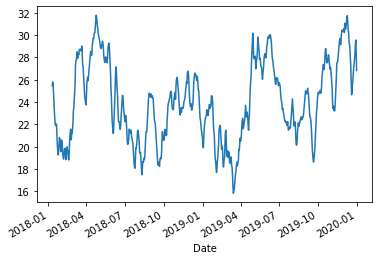

In [5]:
# Table of column values

print(weather_columns[0] + " : ")
print(weather_data[weather_columns[0]].value_counts(bins = 10))

#Plot
weather_data.set_index('Date')['precipitable_water_entire_atmosphere'].rolling(10).mean().plot()

##### relative_humidity_2m_above_ground

relative_humidity_2m_above_ground : 
(85.055, 90.412]    253
(79.699, 85.055]    164
(90.412, 95.769]    137
(74.342, 79.699]     65
(68.985, 74.342]     46
(63.628, 68.985]     26
(58.271, 63.628]     22
(52.914, 58.271]      9
(42.145, 47.557]      4
(47.557, 52.914]      2
Name: relative_humidity_2m_above_ground, dtype: int64


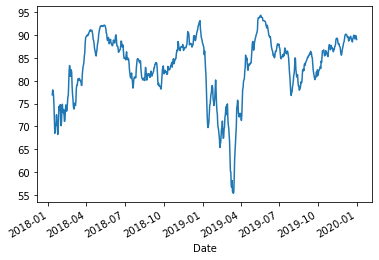

In [6]:
# Table of column values

print(weather_columns[1] + " : ")
print(weather_data[weather_columns[1]].value_counts(bins = 10))

#Plot
weather_data.set_index('Date')['relative_humidity_2m_above_ground'].rolling(10).mean().plot()

##### specific_humidity_2m_above_ground

specific_humidity_2m_above_ground : 
(0.0112, 0.0119]      173
(0.0119, 0.0126]      140
(0.0105, 0.0112]      116
(0.00983, 0.0105]      91
(0.00914, 0.00983]     73
(0.0126, 0.0133]       55
(0.00845, 0.00914]     45
(0.00776, 0.00845]     21
(0.00707, 0.00776]     11
(0.00537, 0.00707]      3
Name: specific_humidity_2m_above_ground, dtype: int64


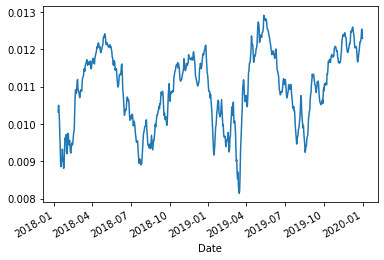

In [7]:
# Table of column values

print(weather_columns[2] + " : ")
print(weather_data[weather_columns[2]].value_counts(bins = 10))

#Plot
weather_data.set_index('Date')['specific_humidity_2m_above_ground'].rolling(10).mean().plot()

##### temperature_2m_above_ground

temperature_2m_above_ground : 
(15.021, 15.839]                225
(14.203, 15.021]                162
(15.839, 16.657]                135
(13.386, 14.203]                 93
(16.657, 17.475]                 57
(12.568, 13.386]                 34
(11.741000000000001, 12.568]     12
(17.475, 18.292]                  7
(18.292, 19.11]                   2
(19.11, 19.928]                   1
Name: temperature_2m_above_ground, dtype: int64


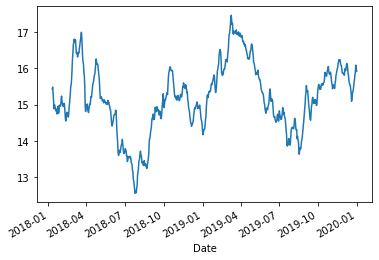

In [8]:
# Table of column values

print(weather_columns[3] + " : ")
print(weather_data[weather_columns[3]].value_counts(bins = 10))

#Plot
weather_data.set_index('Date')['temperature_2m_above_ground'].rolling(10).mean().plot()

##### u_component_of_wind_10m_above_ground

u_component_of_wind_10m_above_ground : 
(-2.137, -1.201]    226
(-3.073, -2.137]    191
(-1.201, -0.265]    124
(-4.009, -3.073]    100
(-0.265, 0.671]      46
(-4.944, -4.009]     18
(0.671, 1.606]       10
(1.606, 2.542]        5
(-5.891, -4.944]      5
(2.542, 3.478]        3
Name: u_component_of_wind_10m_above_ground, dtype: int64


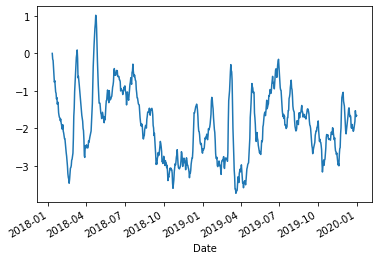

In [9]:
# Table of column values

print(weather_columns[4] + " : ")
print(weather_data[weather_columns[4]].value_counts(bins = 10))

#Plot
weather_data.set_index('Date')['u_component_of_wind_10m_above_ground'].rolling(10).mean().plot()

##### v_component_of_wind_10m_above_ground

v_component_of_wind_10m_above_ground : 
(-1.489, -0.912]    130
(-0.912, -0.335]    125
(-0.335, 0.242]     113
(-2.066, -1.489]    112
(-2.643, -2.066]     89
(0.242, 0.819]       61
(-3.22, -2.643]      53
(-3.803, -3.22]      21
(0.819, 1.396]       19
(1.396, 1.973]        5
Name: v_component_of_wind_10m_above_ground, dtype: int64


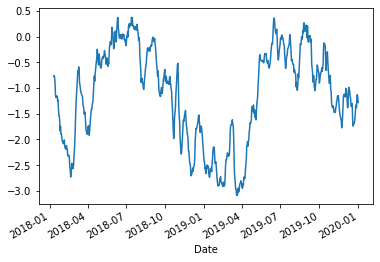

In [10]:
# Table of column values

print(weather_columns[5] + " : ")
print(weather_data[weather_columns[5]].value_counts(bins = 10))

#Plot
weather_data.set_index('Date')['v_component_of_wind_10m_above_ground'].rolling(10).mean().plot()

### Map of number of crashes

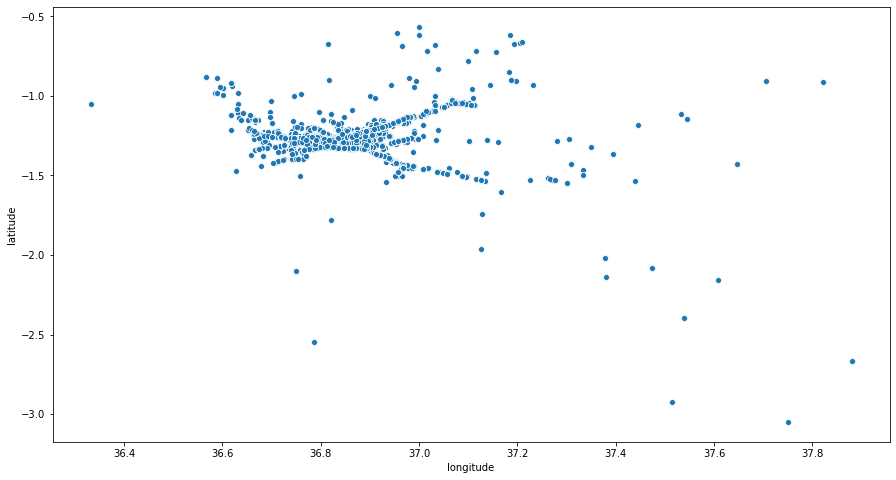

In [8]:
plt.figure(figsize = (15,8))
sns.scatterplot(df["longitude"], df["latitude"])

### Visualization with the real map

In [10]:
import folium

# create the map.
map_pickup = folium.Map(location=[-1.317755,36.830370])

# adding the latitude and longitude points to the map.
df.apply(lambda row:folium.CircleMarker(location=[row["latitude"], row["longitude"]] ).add_to(map_pickup), axis=1)

# display the map: just ask for the object representation in jupyter notebook.
map_pickup

# optional: save the map.
# map_pickup.save('map_pickup.html')

### Hierarchical clustering

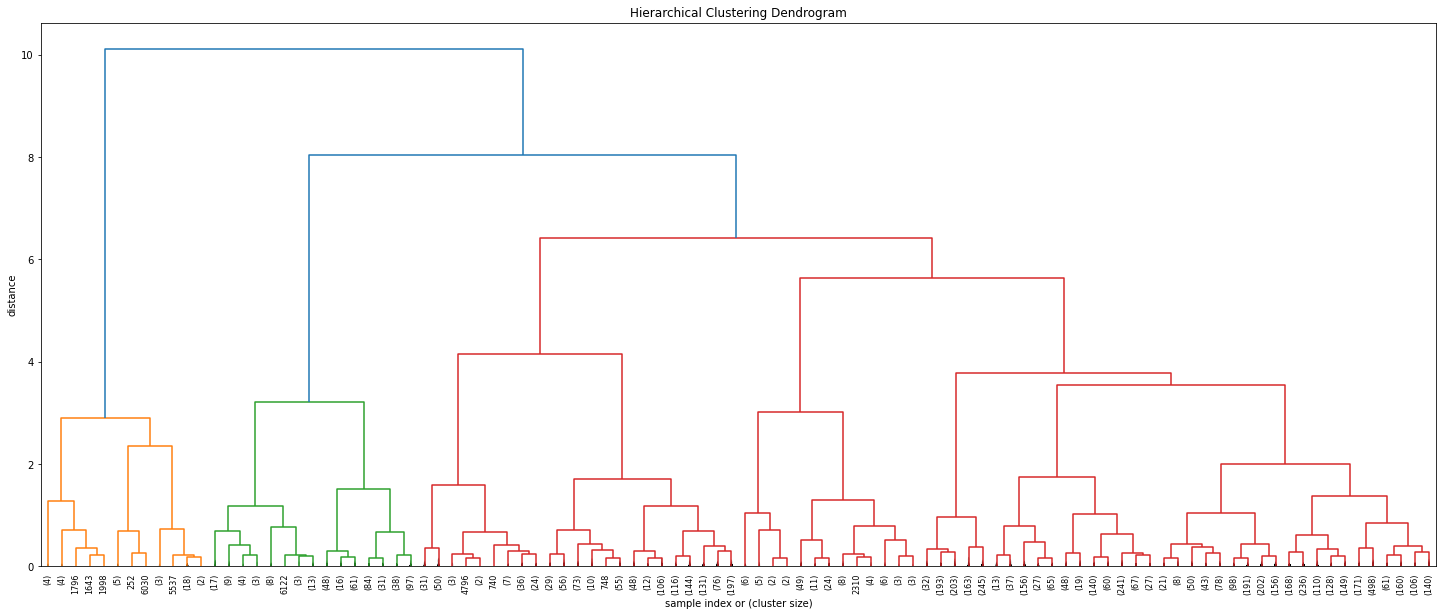

In [10]:
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

def plot_dendrogram(Z, p, d):
    plt.figure(figsize=(25, 10))
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('sample index')
    plt.ylabel('distance')
    fancy_dendrogram(
        Z,
        leaf_rotation=90.,  # rotates the x axis labels
        leaf_font_size=8.,  # font size for the x axis labels
        show_contracted=True,
        truncate_mode='lastp',  # show only the last p merged clusters
        p=p,  # show only the last p merged clusters
        annotate_above=d,  # useful in small plots so annotations don't overlap
    )
    plt.show()

def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

affinity = 'ward'
Z = linkage(df[['latitude','longitude']], affinity)
plot_dendrogram(Z, 
                100,    # only show the last 80 merges
                200)   # only annotates distance above 200